In [1]:
# %matplotlib notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
plt.rcParams['figure.figsize'] = [13, 8]

In [2]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_zro2_del.pkl')
df = pd.read_pickle(path)
df

,structure,name
0,"[[1.39842671 2.40664143 4.37446042] Zr, [3.615...",Ag_ZrO2_cat_3.125_222_m.cif
1,"[[1.41037568 2.41800359 4.39765312] Zr, [3.632...",Ag_ZrO2_cat_3.125_222_o.cif
2,"[[-8.63451586 -8.02576822 -6.33664411] Zr, [-6...",Ag_ZrO2_cat_3.125_222_p-o.cif
3,"[[ 1.30468543 -7.65082882 3.77109169] Zr, [ 3...",Ag_ZrO2_cat_3.125_222_t.cif
4,"[[1.38880269 2.40992106 4.37773968] Zr, [3.657...",Ag_ZrO2_cat_6.25_122_m.cif
...,...,...
1720,"[[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...",Zr_ZrO2_inter_6.25_212_t.cif
1721,"[[ 1.25503143 -10.19349096 -3.47224897] Zr, ...",Zr_ZrO2_inter_6.25_221_m.cif
1722,"[[ -8.73042916 -10.14298992 2.09308249] Zr, ...",Zr_ZrO2_inter_6.25_221_o.cif
1723,"[[-8.87228424 9.95995753 -4.04166983] Zr, [-8...",Zr_ZrO2_inter_6.25_221_p-o.cif


In [4]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern(two_theta_range=(5, 65))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,"[[1.39842671 2.40664143 4.37446042] Zr, [3.615...",Ag_ZrO2_cat_3.125_222_m.cif,4.416524e-90,7.553065e-77,1.056038e-64,1.207117e-53,1.128061e-43,8.618461e-35,5.383199e-27,2.748937e-20,...,3.940231e-02,2.413030e-02,1.844579e-02,0.012606,0.016172,0.019907,0.015147,0.022946,1.712129e-02,4.000450e-03
1,"[[1.41037568 2.41800359 4.39765312] Zr, [3.632...",Ag_ZrO2_cat_3.125_222_o.cif,1.140242e-91,4.223380e-78,1.178427e-65,2.476994e-54,3.922172e-44,4.678515e-35,4.204061e-27,2.845834e-20,...,2.985199e-02,3.943943e-02,2.440916e-02,0.017012,0.024948,0.018048,0.015266,0.019287,3.581692e-03,9.146489e-05
2,"[[-8.63451586 -8.02576822 -6.33664411] Zr, [-6...",Ag_ZrO2_cat_3.125_222_p-o.cif,4.294919e-146,1.886238e-124,1.394965e-104,1.737222e-86,3.643112e-70,1.286515e-55,7.650369e-43,7.660818e-32,...,1.707864e-02,1.975235e-03,1.774841e-03,0.026039,0.019029,0.070907,0.012559,0.000058,5.567788e-09,9.781981e-15
3,"[[ 1.30468543 -7.65082882 3.77109169] Zr, [ 3...",Ag_ZrO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.183138e-18,7.376435e-12,7.291233e-07,0.001025,0.027469,0.040784,0.005271,0.002976,4.842181e-03,4.320153e-04
4,"[[1.38880269 2.40992106 4.37773968] Zr, [3.657...",Ag_ZrO2_cat_6.25_122_m.cif,6.581526e-90,1.121663e-76,1.555255e-64,1.754466e-53,1.610246e-43,1.202384e-34,7.304626e-27,3.610411e-20,...,3.621877e-02,2.325479e-02,1.939606e-02,0.013887,0.015667,0.021050,0.015535,0.024094,1.533142e-02,3.038758e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...",Zr_ZrO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.243777e-17,9.724915e-11,6.624246e-06,0.004116,0.042506,0.021356,0.000423,0.009145,2.783558e-03,7.363515e-06
1721,"[[ 1.25503143 -10.19349096 -3.47224897] Zr, ...",Zr_ZrO2_inter_6.25_221_m.cif,5.495625e-10,1.081056e-06,1.866955e-04,2.878408e-03,4.010013e-03,5.096829e-04,2.906490e-04,1.684574e-03,...,3.419752e-02,2.027501e-02,1.352571e-02,0.014478,0.017365,0.017533,0.010832,0.011316,1.996570e-02,4.749948e-03
1722,"[[ -8.73042916 -10.14298992 2.09308249] Zr, ...",Zr_ZrO2_inter_6.25_221_o.cif,4.250193e-10,9.711560e-07,1.862549e-04,3.020287e-03,4.160615e-03,4.914854e-04,3.270364e-04,1.953052e-03,...,3.770238e-02,2.536069e-02,1.681247e-02,0.017282,0.021668,0.019261,0.012486,0.009837,5.368978e-03,3.075439e-03
1723,"[[-8.87228424 9.95995753 -4.04166983] Zr, [-8...",Zr_ZrO2_inter_6.25_221_p-o.cif,6.391673e-17,1.405819e-10,3.311018e-06,8.350462e-04,2.255156e-03,6.521685e-05,2.019575e-08,6.696954e-14,...,4.918829e-17,1.915145e-10,8.012643e-06,0.003812,0.038349,0.020355,0.000504,0.009370,3.006570e-03,1.033065e-05


In [5]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_zro2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [6]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,4.416524e-90,7.553065e-77,1.056038e-64,1.207117e-53,1.128061e-43,8.618461e-35,5.383199e-27,2.748937e-20,1.147632e-14,3.917005e-10,...,3.940231e-02,2.413030e-02,1.844579e-02,0.012606,0.016172,0.019907,0.015147,0.022946,1.712129e-02,4.000450e-03
1,1.140242e-91,4.223380e-78,1.178427e-65,2.476994e-54,3.922172e-44,4.678515e-35,4.204061e-27,2.845834e-20,1.451208e-14,5.574802e-10,...,2.985199e-02,3.943943e-02,2.440916e-02,0.017012,0.024948,0.018048,0.015266,0.019287,3.581692e-03,9.146489e-05
2,4.294919e-146,1.886238e-124,1.394965e-104,1.737222e-86,3.643112e-70,1.286515e-55,7.650369e-43,7.660818e-32,1.291793e-22,3.668058e-15,...,1.707864e-02,1.975235e-03,1.774841e-03,0.026039,0.019029,0.070907,0.012559,0.000058,5.567788e-09,9.781981e-15
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.021750e-290,2.793219e-258,...,1.183138e-18,7.376435e-12,7.291233e-07,0.001025,0.027469,0.040784,0.005271,0.002976,4.842181e-03,4.320153e-04
4,6.581526e-90,1.121663e-76,1.555255e-64,1.754466e-53,1.610246e-43,1.202384e-34,7.304626e-27,3.610411e-20,1.451841e-14,4.749912e-10,...,3.621877e-02,2.325479e-02,1.939606e-02,0.013887,0.015667,0.021050,0.015535,0.024094,1.533142e-02,3.038758e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.817122e-313,1.219890e-278,...,1.243777e-17,9.724915e-11,6.624246e-06,0.004116,0.042506,0.021356,0.000423,0.009145,2.783558e-03,7.363515e-06
1721,5.495625e-10,1.081056e-06,1.866955e-04,2.878408e-03,4.010013e-03,5.096829e-04,2.906490e-04,1.684574e-03,8.379320e-04,3.510517e-05,...,3.419752e-02,2.027501e-02,1.352571e-02,0.014478,0.017365,0.017533,0.010832,0.011316,1.996570e-02,4.749948e-03
1722,4.250193e-10,9.711560e-07,1.862549e-04,3.020287e-03,4.160615e-03,4.914854e-04,3.270364e-04,1.953052e-03,9.592033e-04,3.834392e-05,...,3.770238e-02,2.536069e-02,1.681247e-02,0.017282,0.021668,0.019261,0.012486,0.009837,5.368978e-03,3.075439e-03
1723,6.391673e-17,1.405819e-10,3.311018e-06,8.350462e-04,2.255156e-03,6.521685e-05,2.019575e-08,6.696954e-14,2.377999e-21,9.041972e-31,...,4.918829e-17,1.915145e-10,8.012643e-06,0.003812,0.038349,0.020355,0.000504,0.009370,3.006570e-03,1.033065e-05


In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [119]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

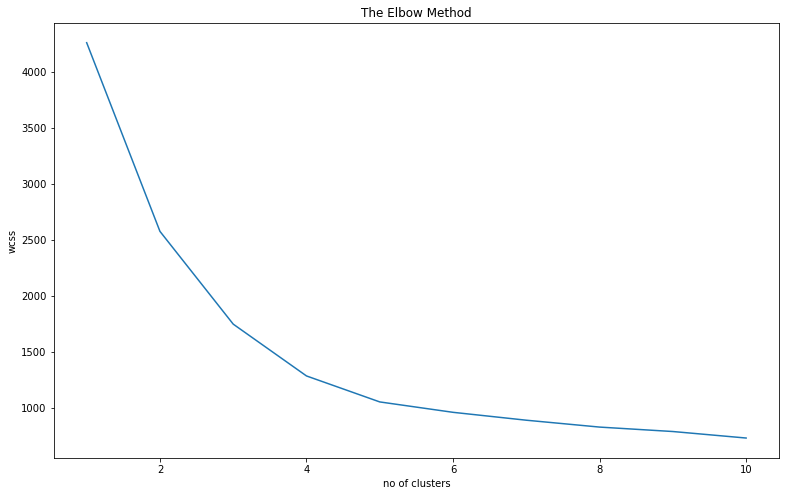

In [120]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
n_components=38
model = NMF(n_components, init='random', random_state=0, max_iter = 2000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 2000 reached. Increase it to improve convergence.



In [24]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.179992,0.021473,0.062751,0.000624,0.110104,0.000333,0.007832,0.002003,0.007451,...,0.004088,0.018886,0.000076,0.033988,0.000002,0.000362,0.000000,0.001322,0.004625,0.009818
1,0.024404,0.000000,0.183894,0.117388,0.002768,0.267619,0.002145,0.004683,0.084058,0.003124,...,0.002522,0.009763,0.003852,0.002155,0.000078,0.000670,0.000000,0.003917,0.005789,0.003258
2,0.022199,0.000000,0.223481,0.027193,0.063334,0.136973,0.023448,0.046179,0.000000,0.000000,...,0.004321,0.083070,0.009690,0.016112,0.000000,0.000346,0.000000,0.000000,0.002866,0.001529
3,0.242837,0.000000,0.390455,0.001515,0.000000,0.321909,0.001739,0.000000,0.000000,0.000120,...,0.000000,0.075289,0.011280,0.000000,0.000000,0.000033,0.000000,0.000000,0.010200,0.000000
4,0.000000,0.123248,0.015727,0.073529,0.003233,0.139663,0.000000,0.011236,0.002454,0.008363,...,0.000054,0.020632,0.000101,0.038669,0.000003,0.000994,0.000000,0.001582,0.004693,0.008846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.369792,0.000000,0.386946,0.022111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.034295,0.003303,0.000000,0.000000,0.000000,0.000000,0.000000,0.017044,0.000000
1721,0.000000,0.495209,0.000000,0.041354,0.007469,0.068205,0.000000,0.006414,0.000172,0.013215,...,0.012324,0.013960,0.001227,0.020568,0.000073,0.003390,0.004629,0.000000,0.004583,0.016812
1722,0.004330,0.016111,0.101101,0.077016,0.005579,0.082523,0.007459,0.003964,0.063808,0.011005,...,0.004109,0.011197,0.002429,0.003928,0.000130,0.000645,0.007611,0.005030,0.005891,0.030505
1723,0.373071,0.000000,0.401122,0.021507,0.000000,0.004144,0.000000,0.000000,0.000000,0.000135,...,0.000000,0.031668,0.003527,0.000000,0.000000,0.000000,0.001232,0.000000,0.014529,0.000000


In [25]:
W_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,...,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.075139,0.086450,0.146703,0.044820,0.014565,0.149086,0.010582,0.011512,0.015567,0.003771,...,0.010543,0.034406,0.005462,0.016199,0.000123,0.001762,0.003616,0.001909,0.007721,0.006661
std,0.092200,0.149150,0.144490,0.056359,0.022495,0.118460,0.011912,0.015476,0.029867,0.005010,...,0.016828,0.033809,0.005154,0.018684,0.000330,0.003482,0.007119,0.003191,0.004732,0.008890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013272,0.000000,0.004317,0.003510,0.000017,0.065432,0.000608,0.000773,0.000000,0.000000,...,0.000000,0.008453,0.001340,0.000192,0.000000,0.000045,0.000000,0.000000,0.004468,0.000000
50%,0.038330,0.000095,0.121546,0.028127,0.003211,0.107911,0.006164,0.004940,0.000378,0.000989,...,0.004535,0.019784,0.003857,0.008410,0.000014,0.000561,0.000070,0.000381,0.006477,0.004048
75%,0.088984,0.163276,0.263526,0.065470,0.012290,0.199483,0.020023,0.012373,0.004099,0.006434,...,0.010922,0.055926,0.008615,0.027835,0.000083,0.002113,0.003740,0.002833,0.009763,0.010655
max,0.405094,0.549606,0.638264,0.564537,0.079609,0.575620,0.081161,0.085255,0.090989,0.031958,...,0.114096,0.138219,0.028441,0.109528,0.002762,0.042780,0.039032,0.036508,0.027969,0.096166


In [26]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [27]:
from sklearn import metrics
metrics.silhouette_score(W_df, nmf_labels, metric='l2')

0.3506754048133177

In [28]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
names = []
for i in range(1, n_components +1): 
    names.append( 'x' + str(i))

signs = ['cluster', 'labels'] 
W_df.columns = names + signs
W_df.head(40)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,cluster,labels
0,0.000000,0.179992,0.021473,0.062751,0.000624,0.110104,0.000333,0.007832,0.002003,0.007451,...,0.000076,0.033988,0.000002,0.000362,0.000000,0.001322,0.004625,0.009818,1,m
1,0.024404,0.000000,0.183894,0.117388,0.002768,0.267619,0.002145,0.004683,0.084058,0.003124,...,0.003852,0.002155,0.000078,0.000670,0.000000,0.003917,0.005789,0.003258,0,o
2,0.022199,0.000000,0.223481,0.027193,0.063334,0.136973,0.023448,0.046179,0.000000,0.000000,...,0.009690,0.016112,0.000000,0.000346,0.000000,0.000000,0.002866,0.001529,2,p-o
3,0.242837,0.000000,0.390455,0.001515,0.000000,0.321909,0.001739,0.000000,0.000000,0.000120,...,0.011280,0.000000,0.000000,0.000033,0.000000,0.000000,0.010200,0.000000,2,t
4,0.000000,0.123248,0.015727,0.073529,0.003233,0.139663,0.000000,0.011236,0.002454,0.008363,...,0.000101,0.038669,0.000003,0.000994,0.000000,0.001582,0.004693,0.008846,1,m
5,0.054175,0.000000,0.189986,0.006574,0.065226,0.139496,0.023861,0.040933,0.000000,0.000000,...,0.008447,0.023496,0.000000,0.000702,0.000000,0.000000,0.005916,0.002509,2,p-o
6,0.250468,0.000000,0.404744,0.009859,0.000000,0.299600,0.000000,0.000000,0.000000,0.000000,...,0.010841,0.000000,0.000000,0.000053,0.000000,0.000000,0.014539,0.000000,2,t
7,0.038777,0.274618,0.009215,0.036907,0.003498,0.101082,0.000000,0.007527,0.001728,0.006259,...,0.000009,0.026076,0.000010,0.001948,0.000000,0.000086,0.006196,0.011972,1,m
8,0.018280,0.000000,0.101951,0.118837,0.001489,0.283889,0.006164,0.004995,0.082546,0.003394,...,0.003839,0.002954,0.000054,0.000919,0.000000,0.003857,0.005594,0.001658,0,o
9,0.056444,0.000000,0.184962,0.012657,0.064451,0.137722,0.023240,0.041271,0.000000,0.000000,...,0.008982,0.026009,0.000000,0.000869,0.000000,0.000000,0.004487,0.002442,2,p-o


In [29]:
W_df


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,cluster,labels
0,0.000000,0.179992,0.021473,0.062751,0.000624,0.110104,0.000333,0.007832,0.002003,0.007451,...,0.000076,0.033988,0.000002,0.000362,0.000000,0.001322,0.004625,0.009818,1,m
1,0.024404,0.000000,0.183894,0.117388,0.002768,0.267619,0.002145,0.004683,0.084058,0.003124,...,0.003852,0.002155,0.000078,0.000670,0.000000,0.003917,0.005789,0.003258,0,o
2,0.022199,0.000000,0.223481,0.027193,0.063334,0.136973,0.023448,0.046179,0.000000,0.000000,...,0.009690,0.016112,0.000000,0.000346,0.000000,0.000000,0.002866,0.001529,2,p-o
3,0.242837,0.000000,0.390455,0.001515,0.000000,0.321909,0.001739,0.000000,0.000000,0.000120,...,0.011280,0.000000,0.000000,0.000033,0.000000,0.000000,0.010200,0.000000,2,t
4,0.000000,0.123248,0.015727,0.073529,0.003233,0.139663,0.000000,0.011236,0.002454,0.008363,...,0.000101,0.038669,0.000003,0.000994,0.000000,0.001582,0.004693,0.008846,1,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.369792,0.000000,0.386946,0.022111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003303,0.000000,0.000000,0.000000,0.000000,0.000000,0.017044,0.000000,2,t
1721,0.000000,0.495209,0.000000,0.041354,0.007469,0.068205,0.000000,0.006414,0.000172,0.013215,...,0.001227,0.020568,0.000073,0.003390,0.004629,0.000000,0.004583,0.016812,1,m
1722,0.004330,0.016111,0.101101,0.077016,0.005579,0.082523,0.007459,0.003964,0.063808,0.011005,...,0.002429,0.003928,0.000130,0.000645,0.007611,0.005030,0.005891,0.030505,3,o
1723,0.373071,0.000000,0.401122,0.021507,0.000000,0.004144,0.000000,0.000000,0.000000,0.000135,...,0.003527,0.000000,0.000000,0.000000,0.001232,0.000000,0.014529,0.000000,2,unknown


Text(0.5, 0.98, '2D NMF Predicted Clusters')

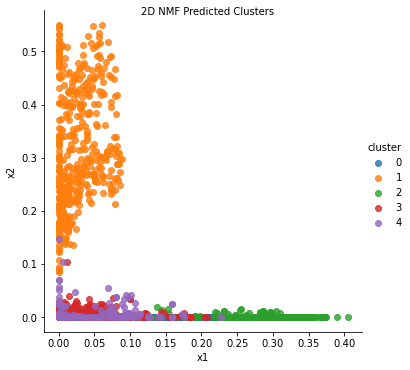

In [30]:
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Predicted Clusters", fontsize=10)

Text(0.5, 0.98, '2D NMF Ground Truth')

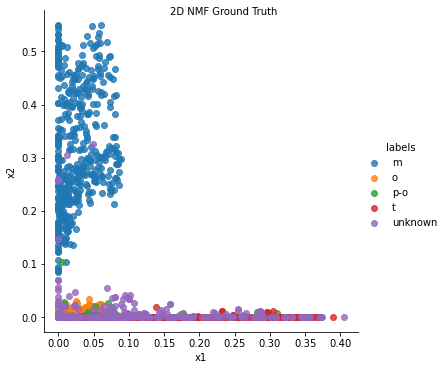

In [31]:
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Ground Truth", fontsize=10)

In [32]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [33]:
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()

In [34]:
W_df.head(20)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,cluster,labels
0,0.000000,0.179992,0.021473,0.062751,0.000624,0.110104,0.000333,0.007832,0.002003,0.007451,...,0.000076,0.033988,0.000002,0.000362,0.000000,0.001322,0.004625,0.009818,1,m
1,0.024404,0.000000,0.183894,0.117388,0.002768,0.267619,0.002145,0.004683,0.084058,0.003124,...,0.003852,0.002155,0.000078,0.000670,0.000000,0.003917,0.005789,0.003258,0,o
2,0.022199,0.000000,0.223481,0.027193,0.063334,0.136973,0.023448,0.046179,0.000000,0.000000,...,0.009690,0.016112,0.000000,0.000346,0.000000,0.000000,0.002866,0.001529,2,p-o
3,0.242837,0.000000,0.390455,0.001515,0.000000,0.321909,0.001739,0.000000,0.000000,0.000120,...,0.011280,0.000000,0.000000,0.000033,0.000000,0.000000,0.010200,0.000000,2,t
4,0.000000,0.123248,0.015727,0.073529,0.003233,0.139663,0.000000,0.011236,0.002454,0.008363,...,0.000101,0.038669,0.000003,0.000994,0.000000,0.001582,0.004693,0.008846,1,m
5,0.054175,0.000000,0.189986,0.006574,0.065226,0.139496,0.023861,0.040933,0.000000,0.000000,...,0.008447,0.023496,0.000000,0.000702,0.000000,0.000000,0.005916,0.002509,2,p-o
6,0.250468,0.000000,0.404744,0.009859,0.000000,0.299600,0.000000,0.000000,0.000000,0.000000,...,0.010841,0.000000,0.000000,0.000053,0.000000,0.000000,0.014539,0.000000,2,t
7,0.038777,0.274618,0.009215,0.036907,0.003498,0.101082,0.000000,0.007527,0.001728,0.006259,...,0.000009,0.026076,0.000010,0.001948,0.000000,0.000086,0.006196,0.011972,1,m
8,0.018280,0.000000,0.101951,0.118837,0.001489,0.283889,0.006164,0.004995,0.082546,0.003394,...,0.003839,0.002954,0.000054,0.000919,0.000000,0.003857,0.005594,0.001658,0,o
9,0.056444,0.000000,0.184962,0.012657,0.064451,0.137722,0.023240,0.041271,0.000000,0.000000,...,0.008982,0.026009,0.000000,0.000869,0.000000,0.000000,0.004487,0.002442,2,p-o


In [115]:
# look at the above table
W_df = W_df.replace({'m': 1, 'p-o': 0, 'o': 0, 't': 4, 'unknown': 3})

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(W_df['labels'], W_df['cluster'])

0.9031884057971015

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(W_df['labels'], W_df['cluster'])

In [18]:
# Hyperparameter Testing
def nmf_algo(X, comp):
    from sklearn.decomposition import NMF

    model = NMF(n_components=comp, init='random', random_state=0, max_iter = 8000)
    nmf_features_W = model.fit_transform(X)
    nmf_componentes_H = model.components_
    nmf_df = pd.DataFrame(nmf_componentes_H.T)
    W_df = pd.DataFrame(nmf_features_W) # weights represent abundence of phase at a given nominal composition
    return W_df

In [19]:
def kmeans_algo(df):
    kmeans = KMeans(n_clusters=5)
    labels = kmeans.fit_predict(df)
    df['cluster'] = labels
    df['labels'] = labels_true
    return df

In [20]:
def sort_clusterlabels(df_kmeans):
    df_times = df_kmeans.groupby(["labels", "cluster"]).size().reset_index(name="Time")
    
    unknown_df = df_times[df_times['labels'].str.match('unknown')]
    m_df = df_times[df_times['labels'].str.match('m')]
    po_df = df_times[df_times['labels'].str.match('p-o')]
    o_df = df_times[df_times['labels'].str.match('o')]
    t_df = df_times[df_times['labels'].str.match('t')]
    
    unk_newlabel = unknown_df.loc[unknown_df['Time'] == unknown_df.Time.max(), 'cluster'].values[0]
    m_newlabel = m_df.loc[m_df['Time'] == m_df.Time.max(), 'cluster'].values[0]
    po_newlabel = po_df.loc[po_df['Time'] == po_df.Time.max(), 'cluster'].values[0]
    o_newlabel = o_df.loc[o_df['Time'] == o_df.Time.max(), 'cluster'].values[0]
    t_newlabel = t_df.loc[t_df['Time'] == t_df.Time.max(), 'cluster'].values[0]
    
    df_kmeans = df_kmeans.replace({'m': m_newlabel, 
                             'p-o': po_newlabel, 
                             'o': o_newlabel, 
                             't':t_newlabel , 
                             'unknown': unk_newlabel})
    return df_kmeans

In [21]:

from sklearn.metrics import accuracy_score
components = list(range(2, 50 , 1))
performance = []
i = 1
for component in components: 
    W_df = nmf_algo(X, component)
    W_df_kmeans = kmeans_algo(W_df)
    W_df_kmeans = sort_clusterlabels(W_df_kmeans)
    acc = accuracy_score(W_df_kmeans['labels'], W_df_kmeans['cluster'])
    performance.append(acc)
    print("Round: " + str(i))
    i = i + 1
    
    
perf_dic = dict(zip(components, performance))
print('Best value of performance: ' + str(max(perf_dic.values())) + ' Components = ' + str(max(perf_dic, key=perf_dic.get)))


Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 29
Round: 30
Round: 31


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 32


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 33


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 34
Round: 35
Round: 36


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 37


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 38
Round: 39


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 40


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 41
Round: 42


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 43


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 44
Round: 45


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 46
Round: 47


C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning:

Maximum number of iterations 8000 reached. Increase it to improve convergence.



Round: 48
Best value of performance: 0.8828985507246376 Components = 38


In [22]:
perf_dic

{2: 0.7907246376811594,
 3: 0.7391304347826086,
 4: 0.8347826086956521,
 5: 0.8614492753623189,
 6: 0.8510144927536232,
 7: 0.8684057971014493,
 8: 0.856231884057971,
 9: 0.8579710144927536,
 10: 0.856231884057971,
 11: 0.8614492753623189,
 12: 0.8417391304347827,
 13: 0.8353623188405798,
 14: 0.8452173913043478,
 15: 0.7118840579710145,
 16: 0.8724637681159421,
 17: 0.8208695652173913,
 18: 0.8272463768115942,
 19: 0.8011594202898551,
 20: 0.863768115942029,
 21: 0.7704347826086957,
 22: 0.735072463768116,
 23: 0.8185507246376812,
 24: 0.8515942028985507,
 25: 0.7855072463768116,
 26: 0.7663768115942029,
 27: 0.7820289855072464,
 28: 0.7860869565217391,
 29: 0.8597101449275363,
 30: 0.8556521739130435,
 31: 0.7495652173913043,
 32: 0.871304347826087,
 33: 0.8336231884057971,
 34: 0.8765217391304347,
 35: 0.8579710144927536,
 36: 0.8678260869565217,
 37: 0.8771014492753623,
 38: 0.8828985507246376,
 39: 0.8539130434782609,
 40: 0.7536231884057971,
 41: 0.8440579710144928,
 42: 0.852753